# Data Story EDA - Rise and Fall of Rafael Nadal

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>


In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%pylab 
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as pyplot
from scipy import stats

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Intro

Since Nadal burst on the scene with a French Open victory in 2005, he has been part of an elite group of tennis players, consistently challenging for grand slam titles and winning a remarkable number of them.

He quickly established himself as Roger Federer's main competitor and had a firm hold on the #2 ranking. The rivalry between the two players has been seen as one of the greatest in tennis ***(add citation)*** 



## Research Questions

1. Changes in First Serve, second serve forehand, backhand %
 
2. Changes in unforced errors and winners

3. Changes in results to top players, other players

4. In cases where nadal has the ball in his comfort zone (forhand middle of the court, short ball), how does he react?

## Methodology & Data

## Key Findings

1. Rafael Nadal has seen a significant decline in results 

2. The second serve is down.

## Reading in the Data 

In [32]:
#Need to add latin-1 encoding to import the match and points data, not sure why that is the case.

nadal_rankings = pd.read_csv('/Users/amanbirs/Dropbox/Datasets/Nadal_atp_rankings_160425.csv')
match_data = pd.read_csv('/Users/amanbirs/Dropbox/Datasets/tennis_MatchChartingProject-master/charting-m-matches.csv', header = 0, encoding='latin-1')
point_data = pd.read_csv('/Users/amanbirs/Dropbox/Datasets/tennis_MatchChartingProject-master/charting-m-points.csv', header = 0, encoding='latin-1')
match_overview_data = pd.read_csv('/Users/amanbirs/Dropbox/Datasets/tennis_MatchChartingProject-master/charting-m-stats-Overview.csv', header = 0, encoding='latin-1')



//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (12,24,25,26,31,32,33,34,35,45,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
atp_results =  pd.read_csv('/Users/amanbirs/Dropbox/Datasets/tennis_atp-master/atp_matches_2006.csv')
# importing results data
for year in range(2007, 2016):
    atp_results_yr = pd.read_csv('/Users/amanbirs/Dropbox/Datasets/tennis_atp-master/atp_matches_' + str(year) + '.csv')
    atp_results = atp_results.append(atp_results_yr)

## EDA

### Graphing the Changes in Ranking

In [67]:
# converting date column to the correct format
nadal_rankings['DATE'] = pd.to_datetime(nadal_rankings['DATE'])

# making ranking column numeric
nadal_rankings['SINGLES'] = nadal_rankings['SINGLES'].str.replace('T', '')
nadal_rankings['SINGLES'] = pd.to_numeric(nadal_rankings['SINGLES'])

#### Nadal's Ranking's have fluctuated a lot over the past 10 years

Till late 2014 Nadal was a dominant player and even spent 84 weeks at #1. Although he had a brief dip in the middle of 2013, this was largely due to injuries ***add citation***. Once he recovered he reclaimed the top spot. 

Since then though he has struggled with injuries and form. He has fallen out of the top two and has seen his ranking bounce around the top 10. 

We can split his career into three phases:

1. **From 2006 till 2010:**  Nadal and Federer are the domninant tennis players on the circuit and share the top two spots. No one really looks like coming close to the two of them.
    
    Nadal arguably has his most succesful year in 2010, winning the French Open, Wimbledon and US Open. He regained the #1 ranking this year after coming back from injury and completed his career grand slam by winning the US Open. He was even awared the Laureus World Sportsman of the Year award for his achievements in 2010.

    
2. **2011 till 2015:**  While Nadal and Federer are still top players, a new generation of stars has emerged and begun to effectively compete with them. In 2011, Djokovic is the #1 player in the world and he wins three masters in the year as well - the Australian Open, Wimbledon and the US Open. The "Big Four" - Roger Federer, Rafael Nadal, Novak Djokovic and Andy Murray are the dominant players. 

    Nadal continues to compete at the highest level during this period, winning the US Open in 2013 and French Open titles in 2011, 2012, 2013 and 2014. He returns to #1 in 2013. 


3. **2015 till now:**: Nadal's 2014 win at Roland Garros remains his most recent masters victory. Though he is still relatively young his body starts to show the wear of gruelling years on the tour. Repeated injuries have taken him off the tour and have reduced the effectiveness of his physical style of play. 

    His ranking falls outside the top 4 and goes as low as #10. He is currently at #5 in the world.

#### Graph 1: Nadal's Rankings from 2006 to Present

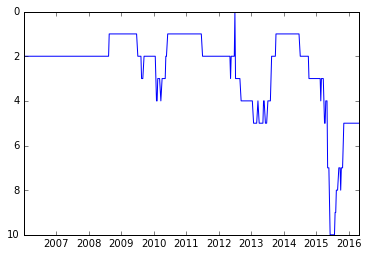

In [68]:
# plotting changes in Nadal's Rankings over the past 10 years
pyplot.gca().invert_yaxis()

ranking_plt = pyplot.plot(nadal_rankings['DATE'][nadal_rankings['DATE'] > '2006.01.01']
    , nadal_rankings['SINGLES'][nadal_rankings['DATE'] > '2006.01.01'])

#### Table of Nadal's Rankings from 2006 to now

In [69]:
nadal_rankings['SINGLES'][nadal_rankings['DATE'] > '2006.01.01'].value_counts().sort_index()

0       1
1     124
2     211
3      44
4      34
5      40
6       1
7       9
8       4
9       2
10      7
Name: SINGLES, dtype: int64

#### Table of Nadal's Rankings from 2006 to 2010

Peaking: From 2006 to 2010 Nadal, along with Federer dominated men's tennis. He won xxx grand-slams and xx consecutive French Open titles. Take a look at his rankings shows his consistency. He only spent three weeks outside the top two. 

In [70]:
nadal_rankings['SINGLES'][(nadal_rankings['DATE'] < '2015.01.01') & 
    (nadal_rankings['DATE'] > '2006.01.01')].value_counts().sort_index()

0      1
1    124
2    211
3     35
4     30
5     16
Name: SINGLES, dtype: int64

#### Table of Nadal's Rankings from 2010 to 2015

In [71]:
nadal_rankings['SINGLES'][(nadal_rankings['DATE'] < '2015.01.01') & 
    (nadal_rankings['DATE'] > '2010.01.01')].value_counts().sort_index()

0     1
1    84
2    70
3    32
4    30
5    16
Name: SINGLES, dtype: int64

#### Table of Nadal's Rankings from 2015 to now

Over the last year and a half Nadal has struggled wiht injuries and has not been able to challenge the top players consistently. He has spent most of his time at #5, his current ranking, and has fallen as low as #10. 

In [72]:
nadal_rankings['SINGLES'][nadal_rankings['DATE'] > '2015.01.01'].value_counts().sort_index()

3      9
4      4
5     24
6      1
7      9
8      4
9      2
10     7
Name: SINGLES, dtype: int64

#### The obvious question then is what changed?

### Graphs and tables to show data on Nadal's Opponents

#### We have data on 141 matches with Nadal

In [73]:
match_data[(match_data['Player 1'] == 'Rafael Nadal') | 
           (match_data['Player 2'] == 'Rafael Nadal') ].count()

match_id      141
Player 1      141
Player 2      141
Pl 1 hand     141
Pl 2 hand     141
Gender        141
Date          141
Tournament    141
Round         141
Time           69
Court         103
Surface       141
Umpire         93
Best of       141
Final TB?     141
Charted by    141
dtype: int64

In [74]:
# making a consolidated dataset for nadal matches
nadal_match_data = match_data[(match_data['Player 1'] == 'Rafael Nadal') | 
                              (match_data['Player 2'] == 'Rafael Nadal') ]

nadal_data = nadal_match_data.merge(match_overview_data, on = 'match_id', how = 'inner', indicator = True)
nadal_data['_merge'].value_counts()


both          1052
right_only       0
left_only        0
dtype: int64

In [75]:
nadal_data['set'].value_counts()


1        282
Total    282
2        280
3        142
4         52
5         14
Name: set, dtype: int64

#### Opponents in the data

In [76]:
nadal_match_data['Player 1'][nadal_match_data['Player 1'] != 'Rafael Nadal'].value_counts()

Novak Djokovic           23
Roger Federer            18
David Ferrer              7
John Isner                3
Robin Soderling           3
Andy Murray               3
Tomas Berdych             3
Richard Gasquet           2
Stanislas Wawrinka        2
Fabio Fognini             2
Dustin Brown              2
Fernando Verdasco         2
Grigor Dimitrov           2
Milos Raonic              2
Andy Roddick              1
Nicolas Kiefer            1
Jarkko Nieminen           1
Mikhail Youzhny           1
Juan Martin Del Potro     1
Horacio Zeballos          1
Mariano Puerta            1
Ivan Dodig                1
Bernard Tomic             1
Radek Stepanek            1
Robby Ginepri             1
Sergiy Stakhovsky         1
Nicolas Almagro           1
Thanasi Kokkinakis        1
Nick Kyrgios              1
Denis Istomin             1
Albert Montanes           1
Andreas Seppi             1
Peter Gojowczyk           1
Alexandr Dolgopolov       1
Gilles Simon              1
Leonardo Mayer      

In [77]:
nadal_match_data['Player 2'][nadal_match_data['Player 2'] != 'Rafael Nadal'].value_counts()

Dominic Thiem                  2
Alexandr Dolgopolov            2
Novak Djokovic                 2
Stanislas Wawrinka             2
Lukas Rosol                    2
Michael Berrer                 2
Teymuraz Gabashvili            1
Nikolay Davydenko              1
Daniel Gimeno Traver           1
Diego Sebastian Schwartzman    1
Illya Marchenko                1
Dusan Lajovic                  1
Joao Sousa                     1
Tobias Kamke                   1
Fernando Gonzalez              1
Juan Martin Del Potro          1
Fabio Fognini                  1
David Nalbandian               1
Federico Delbonis              1
Richard Gasquet                1
Kei Nishikori                  1
Grigor Dimitrov                1
Gael Monfils                   1
Roger Federer                  1
Kevin Anderson                 1
Juan Monaco                    1
Robin Haase                    1
Pablo Andujar                  1
Pablo Carreno Busta            1
Andy Murray                    1
Juan Marti

#### The dataset has 131 Right handed opponnents and 10 Left handed opponents

In [78]:
nadal_match_data['Pl 1 hand'][nadal_match_data['Player 1'] != 'Rafael Nadal'].value_counts()

R     66
R     31
L      7
Name: Pl 1 hand, dtype: int64

In [79]:
nadal_match_data['Pl 2 hand'][nadal_match_data['Player 2'] != 'Rafael Nadal'].value_counts()

R     23
R     11
L      3
Name: Pl 2 hand, dtype: int64

#### 66 matches on hard courts, 61 on clay and 12 on Grass

In [80]:
nadal_match_data['Surface'].value_counts()

Hard           66
Clay           60
Grass          12
Indoor hard     2
Clay            1
Name: Surface, dtype: int64

In [81]:
# creating an id for the player # that nadal has been assigned. ie nadal_id = 1 if nadal is player 1, 2 if nadal is player 2
nadal_data['nadal_id'] = np.nan

nadal_data['nadal_id'] = nadal_data[(nadal_data['Player 1'] == 'Rafael Nadal')]['nadal_id'].fillna(1)
nadal_data['nadal_id'] = nadal_data['nadal_id'].fillna(2)


In [82]:
nadal_data['Date'] = pd.to_datetime(nadal_data['Date'])

### Win %

In [63]:
nadal_results = atp_results[(atp_results['winner_name'] == "Rafael Nadal") | (atp_results['loser_name'] == "Rafael Nadal")]

In [99]:
number_matches_won_phase1_2 = nadal_results[(nadal_results['tourney_date'] > 20060000) 
                                            & (nadal_results['tourney_date'] < 20150000)]['winner_name'].value_counts()  

number_matches_played_phase1_2 = nadal_results[(nadal_results['tourney_date'] > 20060000) 
                                               & (nadal_results['tourney_date'] < 20150000)]['winner_name'].count()

number_matches_won_phase1_2['Rafael Nadal'] / number_matches_played_phase1_2

0.85238784370477572

In [100]:
number_matches_won_phase3 = nadal_results[(nadal_results['tourney_date'] >= 20150000)]['winner_name'].value_counts()  

number_matches_played_phase3 = nadal_results[(nadal_results['tourney_date'] >= 20150000)]['winner_name'].count()

number_matches_won_phase3['Rafael Nadal'] / number_matches_played_phase3

0.75308641975308643

## Key Indicators of Nadal's Game

### Serve Analysis

If we compare Nadal's service statistics between 2006 and 2015 with his service statistics after 2015, we see that he is getting his serves in with the same consistency, but is winning less points per first serve or per second serve.

The percentage of points won on his first serve is down from 71% to 69% and the variance has also increased.

The win percentage for the second serve is down from 56% to just 51% since 2015.

In [83]:
# constructing important indicators

nadal_data['first_in_perc'] = nadal_data['first_in'] / nadal_data['serve_pts']
nadal_data['first_won_perc'] = nadal_data['first_won'] / nadal_data['first_in']

nadal_data['second_in_perc'] = nadal_data['second_in'] / nadal_data['serve_pts']
nadal_data['second_won_perc'] = nadal_data['second_won'] / nadal_data['second_in']


---

In [136]:
stats.ttest_ind(nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['second_won_perc'],
            nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['second_won_perc'])

Ttest_indResult(statistic=1.7563600681915756, pvalue=0.081245199270431626)

In [84]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['first_in_perc'].describe()

count    113.000000
mean       0.698034
std        0.065817
min        0.405797
25%        0.651163
50%        0.705263
75%        0.743243
max        0.833333
Name: first_in_perc, dtype: float64

In [85]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['first_in_perc'].describe()

count    27.000000
mean      0.695918
std       0.047391
min       0.607843
25%       0.668776
50%       0.698795
75%       0.727556
max       0.806452
Name: first_in_perc, dtype: float64

---

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   3.,   4.,
         12.,  10.,   9.,  12.,  14.,  11.,  14.,  11.,   5.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,
         0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,
         0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,
         0.94,  0.96,  0.98,  1.  ]),
 <a list of 30 Patch objects>)

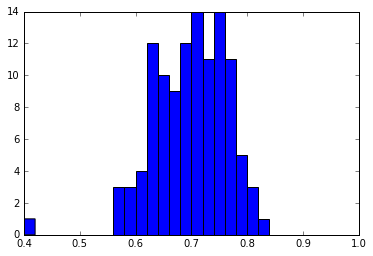

In [86]:
pyplot.hist(nadal_data[(nadal_data['Date'] < '2015-01-01') & 
                       (nadal_data['Date'] > '2006-01-01') &
                       (nadal_data['set'] == 'Total') &
                       (nadal_data['nadal_id'] == nadal_data['player'])]['first_in_perc'],
           range = (0.4, 1), bins = 30)
    


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,
         5.,  3.,  5.,  5.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([ 0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,
         0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,
         0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,
         0.94,  0.96,  0.98,  1.  ]),
 <a list of 30 Patch objects>)

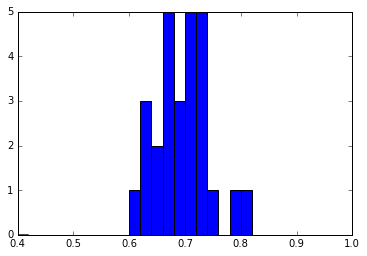

In [87]:
pyplot.hist(nadal_data[(nadal_data['Date'] > '2015-01-01') &
                       (nadal_data['set'] == 'Total') &
                       (nadal_data['nadal_id'] == nadal_data['player'])]['first_in_perc'],
           range = (0.4, 1), bins = 30)


---

In [88]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['serve_pts'].describe()

count    113.000000
mean      79.973451
std       36.806313
min       26.000000
25%       52.000000
50%       72.000000
75%       93.000000
max      218.000000
Name: serve_pts, dtype: float64

In [89]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['serve_pts'].describe()

count     27.000000
mean      74.925926
std       27.266387
min       38.000000
25%       52.000000
50%       73.000000
75%       94.500000
max      138.000000
Name: serve_pts, dtype: float64

---

In [90]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['first_won_perc'].describe()

count    113.000000
mean       0.711456
std        0.085209
min        0.466667
25%        0.666667
50%        0.711111
75%        0.761905
max        0.913043
Name: first_won_perc, dtype: float64

In [91]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['first_won_perc'].describe()

count    27.000000
mean      0.690204
std       0.106784
min       0.481481
25%       0.607492
50%       0.695652
75%       0.761538
max       0.891892
Name: first_won_perc, dtype: float64

(array([  1.,   0.,   0.,   0.,   1.,   3.,   1.,   3.,   4.,   1.,   5.,
          3.,   3.,  10.,   7.,  11.,  11.,  13.,   3.,   5.,   6.,   3.,
          3.,   3.,   4.,   3.,   2.,   1.,   1.,   2.]),
 array([ 0.46666667,  0.48154589,  0.49642512,  0.51130435,  0.52618357,
         0.5410628 ,  0.55594203,  0.57082126,  0.58570048,  0.60057971,
         0.61545894,  0.63033816,  0.64521739,  0.66009662,  0.67497585,
         0.68985507,  0.7047343 ,  0.71961353,  0.73449275,  0.74937198,
         0.76425121,  0.77913043,  0.79400966,  0.80888889,  0.82376812,
         0.83864734,  0.85352657,  0.8684058 ,  0.88328502,  0.89816425,
         0.91304348]),
 <a list of 30 Patch objects>)

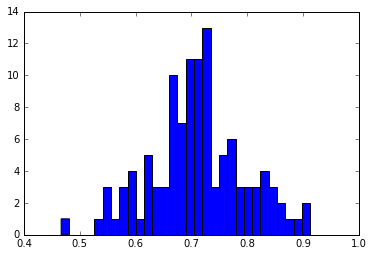

In [92]:
pyplot.hist(nadal_data[(nadal_data['Date'] < '2015-01-01') & 
                       (nadal_data['Date'] > '2006-01-01') &
                       (nadal_data['set'] == 'Total') &
                       (nadal_data['nadal_id'] == nadal_data['player'])]['first_won_perc'],
 bins = 30)

(array([ 1.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,  2.,  1.,  1.,  1.,  1.,
         0.,  2.,  1.,  2.,  2.,  0.,  2.,  0.,  2.,  0.,  0.,  1.,  2.,
         0.,  0.,  1.,  1.]),
 array([ 0.48148148,  0.49516183,  0.50884218,  0.52252252,  0.53620287,
         0.54988322,  0.56356356,  0.57724391,  0.59092426,  0.6046046 ,
         0.61828495,  0.6319653 ,  0.64564565,  0.65932599,  0.67300634,
         0.68668669,  0.70036703,  0.71404738,  0.72772773,  0.74140807,
         0.75508842,  0.76876877,  0.78244912,  0.79612946,  0.80980981,
         0.82349016,  0.8371705 ,  0.85085085,  0.8645312 ,  0.87821154,
         0.89189189]),
 <a list of 30 Patch objects>)

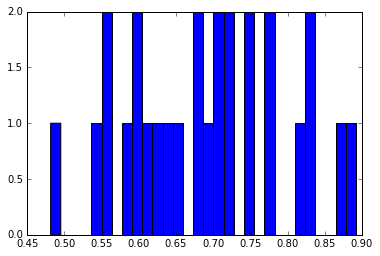

In [93]:
pyplot.hist(nadal_data[(nadal_data['Date'] > '2015-01-01') &
                       (nadal_data['set'] == 'Total') &
                       (nadal_data['nadal_id'] == nadal_data['player'])]['first_won_perc'],
 bins = 30)


---

In [94]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['second_in_perc'].describe()

count    113.000000
mean       0.301966
std        0.065817
min        0.166667
25%        0.256757
50%        0.294737
75%        0.348837
max        0.594203
Name: second_in_perc, dtype: float64

In [95]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['second_in_perc'].describe()

count    27.000000
mean      0.304082
std       0.047391
min       0.193548
25%       0.272444
50%       0.301205
75%       0.331224
max       0.392157
Name: second_in_perc, dtype: float64

---

In [96]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['second_won_perc'].describe()

count    113.000000
mean       0.565263
std        0.134702
min        0.187500
25%        0.473684
50%        0.565217
75%        0.642857
max        0.866667
Name: second_won_perc, dtype: float64

In [97]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['second_won_perc'].describe()

count    27.000000
mean      0.516273
std       0.108769
min       0.285714
25%       0.450957
50%       0.516129
75%       0.612500
max       0.666667
Name: second_won_perc, dtype: float64

### Groundstrokes

In [98]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['bk_pts'].describe()

count    113.000000
mean       6.238938
std        4.430564
min        0.000000
25%        3.000000
50%        5.000000
75%        9.000000
max       20.000000
Name: bk_pts, dtype: float64

In [99]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['bk_pts'].describe()

count    27.000000
mean      6.333333
std       4.531938
min       0.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      18.000000
Name: bk_pts, dtype: float64

---

In [100]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['bp_saved'].describe()

count    113.000000
mean       4.053097
std        3.316196
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       16.000000
Name: bp_saved, dtype: float64

In [101]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['bp_saved'].describe()

count    27.000000
mean      3.629630
std       2.857489
min       0.000000
25%       2.000000
50%       3.000000
75%       5.500000
max      11.000000
Name: bp_saved, dtype: float64

---

In [102]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['return_pts_won'].describe() 

count    113.000000
mean      34.522124
std       14.051625
min        6.000000
25%       25.000000
50%       34.000000
75%       45.000000
max       73.000000
Name: return_pts_won, dtype: float64

In [103]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['return_pts_won'].describe()

count    27.000000
mean     29.592593
std      13.820996
min      10.000000
25%      19.500000
50%      26.000000
75%      36.500000
max      72.000000
Name: return_pts_won, dtype: float64

---

In [104]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['winners'].describe() 

count    113.000000
mean      23.876106
std       12.239524
min        5.000000
25%       15.000000
50%       20.000000
75%       30.000000
max       65.000000
Name: winners, dtype: float64

In [105]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['winners'].describe()

count    27.000000
mean     20.962963
std       9.913012
min       7.000000
25%      14.000000
50%      19.000000
75%      27.000000
max      47.000000
Name: winners, dtype: float64

---

In [106]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['winners_fh'].describe() 

count    113.000000
mean      14.805310
std        7.560303
min        2.000000
25%        9.000000
50%       13.000000
75%       21.000000
max       36.000000
Name: winners_fh, dtype: float64

In [107]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['winners_fh'].describe()

count    27.000000
mean     12.000000
std       5.629592
min       3.000000
25%       8.000000
50%      12.000000
75%      17.000000
max      22.000000
Name: winners_fh, dtype: float64

---

In [108]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['winners_bh'].describe()

count    113.000000
mean       5.185841
std        3.534394
min        0.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       16.000000
Name: winners_bh, dtype: float64

In [109]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['winners_bh'].describe()

count    27.000000
mean      5.185185
std       3.174866
min       1.000000
25%       3.000000
50%       4.000000
75%       7.000000
max      14.000000
Name: winners_bh, dtype: float64

---

In [110]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['unforced'].describe()

count    113.00000
mean      22.40708
std       11.11919
min        2.00000
25%       14.00000
50%       21.00000
75%       30.00000
max       63.00000
Name: unforced, dtype: float64

In [111]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['unforced'].describe() 

count    27.000000
mean     22.481481
std      10.595247
min       3.000000
25%      14.500000
50%      22.000000
75%      27.500000
max      45.000000
Name: unforced, dtype: float64

---

In [112]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['unforced_fh'].describe()

count    113.000000
mean      11.654867
std        6.469392
min        1.000000
25%        6.000000
50%       11.000000
75%       16.000000
max       33.000000
Name: unforced_fh, dtype: float64

In [113]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['unforced_fh'].describe() 

count    27.000000
mean     12.185185
std       5.837788
min       0.000000
25%       9.000000
50%      12.000000
75%      14.500000
max      26.000000
Name: unforced_fh, dtype: float64

---

In [114]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['unforced_bh'].describe()

count    113.000000
mean       9.247788
std        5.285646
min        1.000000
25%        5.000000
50%        8.000000
75%       12.000000
max       32.000000
Name: unforced_bh, dtype: float64

In [115]:
nadal_data[(nadal_data['Date'] > '2015-01-01') &
           (nadal_data['set'] == 'Total') &
           (nadal_data['nadal_id'] == nadal_data['player'])]['unforced_bh'].describe() 

count    27.000000
mean      8.444444
std       5.672697
min       0.000000
25%       4.000000
50%       7.000000
75%      12.000000
max      23.000000
Name: unforced_bh, dtype: float64

## Key Indicators of Nadal's Opponents 

# Playing Around - Temp Section, to be deleted or moved to appendix

In [116]:
nadal_rankings.head()

,DATE,SINGLES,DOUBLES
0,2016-04-25,5,147
1,2016-04-18,5,145
2,2016-04-11,5,144
3,2016-04-04,5,146
4,2016-03-21,5,178


In [117]:
nadal_rankings['SINGLES'].value_counts().sort_index()[1:21]

1     124
2     233
3      50
4      34
5      43
6       1
7      11
8       4
9       2
10      7
11      1
17      2
30      1
31      2
34      2
35      1
36      1
37      2
39      1
40      4
Name: SINGLES, dtype: int64

In [66]:
nadal_results['winner_name'].value_counts()

Rafael Nadal              650
Novak Djokovic             23
Roger Federer              10
Andy Murray                 7
Nikolay Davydenko           6
David Ferrer                5
Juan Martin Del Potro       4
Jo Wilfried Tsonga          4
Tomas Berdych               3
Mikhail Youzhny             3
Stanislas Wawrinka          3
Fabio Fognini               3
Feliciano Lopez             3
James Blake                 2
Fernando Verdasco           2
Andy Roddick                2
Alexandr Dolgopolov         2
Gael Monfils                2
Robin Soderling             2
Juan Carlos Ferrero         2
Dustin Brown                2
David Nalbandian            2
Arnaud Clement              1
Nicolas Almagro             1
Guillermo Garcia Lopez      1
Marin Cilic                 1
Fernando Gonzalez           1
Michael Berrer              1
Florian Mayer               1
Borna Coric                 1
Joachim Johansson           1
Jurgen Melzer               1
Gilles Simon                1
Milos Raon

In [65]:
nadal_results['loser_name'].value_counts()

Rafael Nadal             122
Novak Djokovic            23
David Ferrer              21
Roger Federer             21
Tomas Berdych             19
Andy Murray               16
Stanislas Wawrinka        14
Nicolas Almagro           12
Philipp Kohlschreiber     12
Fernando Verdasco         11
Richard Gasquet           11
Mikhail Youzhny           10
Gael Monfils              10
Feliciano Lopez            9
Juan Martin Del Potro      9
Mardy Fish                 8
Jo Wilfried Tsonga         8
Marcos Baghdatis           8
Paul Henri Mathieu         8
Jarkko Nieminen            7
Lleyton Hewitt             7
Gilles Simon               7
Kei Nishikori              7
Fernando Gonzalez          7
Grigor Dimitrov            7
Ernests Gulbis             7
Andy Roddick               6
David Nalbandian           6
Milos Raonic               6
John Isner                 6
                        ... 
Davide Sanguinetti         1
Roberto Bautista Agut      1
Wesley Moodie              1
Karan Rastogi 

In [118]:
nadal_match_data.head()

,match_id,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Gender,Date,Tournament,Round,Time,Court,Surface,Umpire,Best of,Final TB?,Charted by
15,20160319-M-Indian_Wells_Masters-SF-Rafael_Nada...,Rafael Nadal,Novak Djokovic,L,R,M,20160319,Indian Wells Masters,SF,NaN,Stadium 1,Hard,NaN,3,1.0,Isaac
47,20160213-M-Buenos_Aires-SF-Rafael_Nadal-Domini...,Rafael Nadal,Dominic Thiem,L,R,M,20160213,Buenos Aires,SF,14:50,Court Central,Clay,NaN,3,1.0,1HandBH
79,20160110-M-Doha-F-Novak_Djokovic-Rafael_Nadal,Novak Djokovic,Rafael Nadal,R,L,M,20160110,Doha,F,NaN,NaN,Hard,NaN,3,1.0,Isaac
86,20160108-M-Doha-SF-Rafael_Nadal-Illya_Marchenko,Rafael Nadal,Illya Marchenko,L,R,M,20160108,Doha,SF,NaN,NaN,Hard,NaN,3,1.0,Isaac
91,20160106-M-Doha-R16-Rafael_Nadal-Robin_Haase,Rafael Nadal,Robin Haase,L,R,M,20160106,Doha,R16,NaN,NaN,Hard,NaN,3,1.0,Isaac


In [119]:
match_overview_data.head()

,match_id,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh
0,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,Total,69,2,1,32,25,37,21,5,4,63,36,28,10,16,16,6,9
1,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,Total,63,2,2,41,20,22,7,12,4,69,23,14,8,4,26,15,9
2,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,1,26,2,0,15,10,11,6,2,1,18,13,10,3,5,6,2,4
3,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,1,18,0,0,11,3,7,2,3,0,26,10,4,2,2,10,7,3
4,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,2,24,0,0,10,9,14,8,1,1,26,10,9,3,6,6,2,4


In [120]:
nadal_data.columns

Index(['match_id', 'Player 1', 'Player 2', 'Pl 1 hand', 'Pl 2 hand', 'Gender',
       'Date', 'Tournament', 'Round', 'Time', 'Court', 'Surface', 'Umpire',
       'Best of', 'Final TB?', 'Charted by', 'player', 'set', 'serve_pts',
       'aces', 'dfs', 'first_in', 'first_won', 'second_in', 'second_won',
       'bk_pts', 'bp_saved', 'return_pts', 'return_pts_won', 'winners',
       'winners_fh', 'winners_bh', 'unforced', 'unforced_fh', 'unforced_bh',
       '_merge', 'nadal_id', 'first_in_perc', 'first_won_perc',
       'second_in_perc', 'second_won_perc'],
      dtype='object')

use this to track nadal specific data, 
! for first statement will give opponent data

In [121]:
nadal_data[(nadal_data['nadal_id'] == nadal_data['player']) & (nadal_data['set'] == 'Total')]['Player 1'].count()

141

Length of matches, if interested - can add later

In [122]:
nadal_data[(nadal_data['Date'] < '2015-01-01') & 
           (nadal_data['Date'] > '2006-01-01')]['set'].value_counts()

1        226
Total    226
2        224
3        116
4         46
5         12
Name: set, dtype: int64

In [123]:
nadal_data[(nadal_data['Date'] >= '2015-01-01')]['set'].value_counts()

1        54
Total    54
2        54
3        24
4         4
5         2
Name: set, dtype: int64

In [124]:
116 / 224

0.5178571428571429

In [125]:
24 / 54

0.4444444444444444